In [6]:
import pandas as pd
import csv
import json

In [9]:
path = 'D:/Laptop Data/BS IT (post ADP)/3rd Semester/Capstone Project/reviews-classifier/backend/trainedData'
file_path_1 = path+'/cellPhonesAndAccessories.csv'
file_path_2 = path+'/clothingShoesAndJewelry.csv'
file_path_3 = path+'/electronics.csv'
file_path_4 = path+'/homeAndKitchen.csv'
file_path_5 = path+'/toolsAndHomeImprovements.csv'
test = path+'/test.csv'

In [10]:
# Read the CSV file into a DataFrame
# merged_df1 = pd.read_csv(file_path_1)
merged_df2 = pd.read_csv(file_path_2)
# merged_df3 = pd.read_csv(file_path_3)
# merged_df4 = pd.read_csv(file_path_4)
# merged_df5 = pd.read_csv(file_path_5)

C:\Users\Hammad Aslam\AppData\Local\Temp\ipykernel_11548\2019729819.py:3: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df2 = pd.read_csv(file_path_2)


In [11]:
merged_df2.head()

,rating,title_x,text,images_x,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,...,similarity_text_description,similarity_text_features,similarity_text_categories,similarity_text_details,sentiment_scores,review_length,reviews_count,avg_review_length,avg_rating,avg_helpful_votes
0,4.0,"Not waterproof, but a very comfy shoe.",I purchased these bc they are supposed to be w...,[],B096N5WK8Q,B07RGM3DYC,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1675524098918,11,True,...,0.761431,0.769301,0.035825,0.403557,0.9898,1951,4,2144.0,3.5,9.25
1,4.0,"Lovely, but QA issues with sewing",I’ll start by saying I love this robe! I trul...,"[{'attachment_type': 'IMAGE', 'large_image_url...",B07JR4QBZ4,B07BWS4CSM,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1545114577507,26,True,...,0.000000,0.640245,0.021161,0.379596,0.9932,2601,4,2144.0,3.5,9.25
2,3.0,Arrived Damaged : liquid in hub locker!,"Unfortunately Amazon in their wisdom (cough, c...","[{'attachment_type': 'IMAGE', 'large_image_url...",B096S6LZV4,B09NSZ5QMF,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1677938767351,0,True,...,0.000000,0.681852,0.025652,0.294704,0.3603,1719,4,2144.0,3.5,9.25
3,3.0,Useless under 40 degrees.,Useless under 40 degrees unless you’re just ru...,[],B09KMDBDCN,B08NGL3X17,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1677083819242,0,False,...,0.598508,0.588671,0.004464,0.371206,-0.9801,2305,4,2144.0,3.5,9.25
4,5.0,BUY THESE SHOES,I have never left a review before but I felt I...,[],B07RFNKX6N,B07RGM3DYC,AHXP7FDVRQKKOOQ7ATK4YDJHRTRQ,1586790210042,175,True,...,0.735133,0.681657,0.030136,0.363691,0.9336,802,1,802.0,5.0,175.00


In [12]:
# Concatenate the DataFrames
# merged_df = pd.concat([merged_df1, merged_df2, merged_df3, merged_df4, merged_df5], ignore_index=True)
merged_df2.groupby('y').size()

y
0    20000
1    20000
dtype: int64

In [13]:
merged_df2.columns

Index(['rating', 'title_x', 'text', 'images_x', 'asin', 'parent_asin',
       'user_id', 'timestamp', 'helpful_vote', 'verified_purchase',
       'main_category', 'title_y', 'average_rating', 'rating_number',
       'features', 'description', 'price', 'images_y', 'videos', 'store',
       'categories', 'details', 'bought_together', 'subtitle', 'author', 'y',
       'similarity_text_description', 'similarity_text_features',
       'similarity_text_categories', 'similarity_text_details',
       'sentiment_scores', 'review_length', 'reviews_count',
       'avg_review_length', 'avg_rating', 'avg_helpful_votes'],
      dtype='object')

In [19]:
predictor_columns = [
    "text",
    "user_id",
    "helpful_vote",
    "rating",
    "verified_purchase",
    "average_rating",
    "rating_number",
    "similarity_text_description",
    "similarity_text_features",
    "similarity_text_categories",
    "sentiment_scores",
    "review_length",
    "reviews_count",
    "avg_review_length",
    "avg_rating",
    "avg_helpful_votes",
]

In [26]:
df_filtered = merged_df2[predictor_columns]
df_filtered.to_csv('D:/Laptop Data/BS IT (post ADP)/3rd Semester/Capstone Project/reviews-classifier/backend/savedFiles/fashion.csv', index=False)
df_filtered = pd.read_csv('D:/Laptop Data/BS IT (post ADP)/3rd Semester/Capstone Project/reviews-classifier/backend/savedFiles/fashion.csv')
df_filtered.head()

,text,user_id,helpful_vote,rating,verified_purchase,average_rating,rating_number,similarity_text_description,similarity_text_features,similarity_text_categories,sentiment_scores,review_length,reviews_count,avg_review_length,avg_rating,avg_helpful_votes
0,I purchased these bc they are supposed to be w...,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,11,4.0,True,4.7,199,0.761431,0.769301,0.035825,0.9898,1951,4,2144.0,3.5,9.25
1,I’ll start by saying I love this robe! I trul...,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,26,4.0,True,4.6,6737,0.000000,0.640245,0.021161,0.9932,2601,4,2144.0,3.5,9.25
2,"Unfortunately Amazon in their wisdom (cough, c...",AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,0,3.0,True,4.6,2057,0.000000,0.681852,0.025652,0.3603,1719,4,2144.0,3.5,9.25
3,Useless under 40 degrees unless you’re just ru...,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,0,3.0,False,4.6,2469,0.598508,0.588671,0.004464,-0.9801,2305,4,2144.0,3.5,9.25
4,I have never left a review before but I felt I...,AHXP7FDVRQKKOOQ7ATK4YDJHRTRQ,175,5.0,True,4.7,199,0.735133,0.681657,0.030136,0.9336,802,1,802.0,5.0,175.00


In [28]:
df_filtered.to_json('D:/Laptop Data/BS IT (post ADP)/3rd Semester/Capstone Project/reviews-classifier/backend/savedFiles/fashion.json')

In [21]:
# Define the columns that can be used for prediction

#predictor_columns = [
#    'rating', 'verified_purchase', 'main_category', 'average_rating',
#    'rating_number', 'categories','similarity_text_description','similarity_text_features','similarity_text_categories'
#]
# Extract the predictor columns from the DataFrame
#X = merged_df[predictor_columns]
X = merged_df2.dropna(subset=['similarity_text_description']).copy()[predictor_columns]

# Target variable for prediction
#y=merged_df['y']
y = merged_df2.dropna(subset=['similarity_text_description']).copy()['y']
X

,text,user_id,helpful_vote,rating,verified_purchase,average_rating,rating_number,similarity_text_description,similarity_text_features,similarity_text_categories,sentiment_scores,review_length,reviews_count,avg_review_length,avg_rating,avg_helpful_votes
0,I purchased these bc they are supposed to be w...,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,11,4.0,True,4.7,199,0.761431,0.769301,0.035825,0.9898,1951,4,2144.0,3.5,9.25
1,I’ll start by saying I love this robe! I trul...,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,26,4.0,True,4.6,6737,0.000000,0.640245,0.021161,0.9932,2601,4,2144.0,3.5,9.25
2,"Unfortunately Amazon in their wisdom (cough, c...",AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,0,3.0,True,4.6,2057,0.000000,0.681852,0.025652,0.3603,1719,4,2144.0,3.5,9.25
3,Useless under 40 degrees unless you’re just ru...,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,0,3.0,False,4.6,2469,0.598508,0.588671,0.004464,-0.9801,2305,4,2144.0,3.5,9.25
4,I have never left a review before but I felt I...,AHXP7FDVRQKKOOQ7ATK4YDJHRTRQ,175,5.0,True,4.7,199,0.735133,0.681657,0.030136,0.9336,802,1,802.0,5.0,175.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,"Love it, can put lots of jewerly, compact, str...",AGBOXXYLFMQX3ULZBVEALTFERGMA,0,5.0,True,4.1,17,0.305663,0.355677,0.212572,0.8831,153,1,153.0,5.0,0.00
39996,"While the colors and patterns are beautiful, t...",AFANGZRYDXU6RZFWNMAPBLV2AFUA,0,1.0,True,4.7,13860,0.142876,0.485218,0.250192,0.5994,233,1,233.0,1.0,0.00
39997,Shirt was perfect fit,AGT4MFN27CCIP2BFJXVKNKFHVQDA,0,5.0,True,4.7,198,0.481164,0.232841,0.480616,0.7351,21,1,21.0,5.0,0.00
39998,It’s a 2 piece! I wear it with confidence like...,AEVGNSIECIMSO7TP5J5TQHMZKTVA,0,5.0,True,4.0,218,0.584373,0.099337,0.562129,0.7263,66,2,49.0,5.0,0.00


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from joblib import dump, load

# One-hot encode categorical variables
# X_encoded = pd.get_dummies(X, columns=['main_category'])
X_encoded = X
X_encoded = X_encoded.drop(
    columns=[
        "text",
        "user_id",
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42
)


# Initialize the model
model = RandomForestClassifier()

# Train the model on the training data
model.fit(X_train, y_train)
# Save the model
dump(
    model,
    "D:/Laptop Data/BS IT (post ADP)/3rd Semester/Capstone Project/reviews-classifier/backend/models/HelpfulnessClassifierForFashion.joblib",
)

['D:/Laptop Data/BS IT (post ADP)/3rd Semester/Capstone Project/reviews-classifier/backend/models/HelpfulnessClassifierForFashion.joblib']

In [23]:
# Load the model
newmodel = load('D:/Laptop Data/BS IT (post ADP)/3rd Semester/Capstone Project/reviews-classifier/backend/models/HelpfulnessClassifierForFashion.joblib')

y_pred = newmodel.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)
# y_pred

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6025
           1       1.00      1.00      1.00      5975

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



In [24]:
y_test.shape

(60000,)

In [14]:
y_test.head()

32823    1
16298    1
28505    1
6689     0
26893    0
Name: y, dtype: int64

In [15]:
X_encoded

,rating,verified_purchase,average_rating,rating_number,similarity_text_description,similarity_text_features,similarity_text_categories,review_length,reviews_count,avg_review_length,avg_rating,avg_helpful_votes
0,4.0,True,4.7,199,0.761431,0.769301,0.035825,1951,4,2144.0,3.5,9.25
1,4.0,True,4.6,6737,0.000000,0.640245,0.021161,2601,4,2144.0,3.5,9.25
2,3.0,True,4.6,2057,0.000000,0.681852,0.025652,1719,4,2144.0,3.5,9.25
3,3.0,False,4.6,2469,0.598508,0.588671,0.004464,2305,4,2144.0,3.5,9.25
4,5.0,True,4.7,199,0.735133,0.681657,0.030136,802,1,802.0,5.0,175.00
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,5.0,True,4.1,17,0.305663,0.355677,0.212572,153,1,153.0,5.0,0.00
39996,1.0,True,4.7,13860,0.142876,0.485218,0.250192,233,1,233.0,1.0,0.00
39997,5.0,True,4.7,198,0.481164,0.232841,0.480616,21,1,21.0,5.0,0.00
39998,5.0,True,4.0,218,0.584373,0.099337,0.562129,66,2,49.0,5.0,0.00


In [11]:
# test.drop(['categories'], axis=1, inplace=True)
# Make predictions on the testing data
with open('C:/Hammad Aslam/BS IT (post ADP)/3rd Semester/Capstone Project/Project/backend/datasets/categories/allFiles/computers_laptops.json', 'r') as f:
    data = json.load(f)
for i, product in enumerate(data):
    for j, review in enumerate(product['reviews']):
        row = [review['review_rating'], review['purchased_product'], product['product_rating_points'], product['product_ratings'], review['similarity_text_description'],
               review['similarity_text_features'], review['similarity_text_categories'], review['review_length'], review['reviews_count'], review['avg_review_length'], review['avg_rating']]
        review['review_helpfulness'] = model.predict([row])[0]
        # print(f"text: {review['review_body']}\nhelpfulness: {review['review_helpfulness']}")
def convert(obj):
        if isinstance(obj, (np.int32, np.int64)):
            return int(obj)
        elif isinstance(obj, list):
            return [convert(item) for item in obj]
        elif isinstance(obj, dict):
            return {key: convert(value) for key, value in obj.items()}
        else:
            return obj

newData_serializable = convert(data)
with open('C:/Hammad Aslam/BS IT (post ADP)/3rd Semester/Capstone Project/Project/backend/datasets/categories/allFiles/computers_laptops.json', 'w') as f:
    json.dump(newData_serializable, f, indent=4)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:4

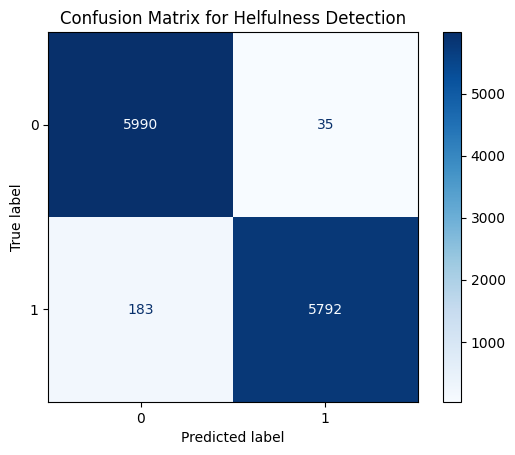

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Helfulness Detection')
plt.show()